## Import libraries and Read in Data
2 files - Daily Stock price data, Sector mapping file

# PowerAI 5.1 Environment support - py2 / tflow 1.5 / xxx


In [1]:
ENV="dustinsmac" # dustinsmac / nimbix
if(ENV == "dustinsmac") : 
    rootdir = "/data/work/git-repos/mldl-101/labxx-eigenportfolios/"
else :
    rootdir = "/data/mldl-101/labxx-eigenportfolios/"

In [2]:
import pandas as pd
import numpy as np
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
#ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
# A,1999-11-18,45.5,50.0,40.0,44.0,44739900.0,0.0,1.0,31.041951216877,34.112034304261,27.289627443409,30.018590187749,44739900.0
# A,1999-11-19,42.94,43.0,39.81,40.38,10897100.0,0.0,1.0,29.295415060499,29.336349501664,27.160001713052,27.548878904121,10897100.0

full_price_df = pd.read_csv(rootdir + "WIKI_PRICES.csv",header=0)
#full_price_df = pd.read_csv(rootdir + "WIKI_PRICES.10000.csv")



In [3]:
#price_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/WIKI_PRICES.10000.csv")
sectors_df = pd.read_csv(rootdir + "snp_sectors.csv")

In [4]:
price_df = full_price_df.copy()

In [12]:
price_df[price_df.ticker == "AAPL"]

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
29499,AAPL,1980-12-12,28.7500,28.8700,28.7500,28.7500,2093900.0,0.00,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
29500,AAPL,1980-12-15,27.3800,27.3800,27.2500,27.2500,785200.0,0.00,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
29501,AAPL,1980-12-16,25.3700,25.3700,25.2500,25.2500,472000.0,0.00,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
29502,AAPL,1980-12-17,25.8700,26.0000,25.8700,25.8700,385900.0,0.00,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
29503,AAPL,1980-12-18,26.6300,26.7500,26.6300,26.6300,327900.0,0.00,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
29504,AAPL,1980-12-19,28.2500,28.3800,28.2500,28.2500,217100.0,0.00,1.0,0.415355,0.417266,0.415355,0.415355,12157600.0
29505,AAPL,1980-12-22,29.6300,29.7500,29.6300,29.6300,166800.0,0.00,1.0,0.435644,0.437409,0.435644,0.435644,9340800.0
29506,AAPL,1980-12-23,30.8800,31.0000,30.8800,30.8800,209600.0,0.00,1.0,0.454023,0.455787,0.454023,0.454023,11737600.0
29507,AAPL,1980-12-24,32.5000,32.6300,32.5000,32.5000,214300.0,0.00,1.0,0.477841,0.479753,0.477841,0.477841,12000800.0
29508,AAPL,1980-12-26,35.5000,35.6200,35.5000,35.5000,248100.0,0.00,1.0,0.521950,0.523714,0.521950,0.521950,13893600.0


## Keep data within date range

In [4]:
# Type conversion for date column.  Just adding a new column called dt
price_df['dt'] = pd.to_datetime(price_df.date, unit='ns') # 
print(price_df.dtypes)

# For now use data from 2017 up through present
price_df = price_df[price_df.dt > '2017-01-01']
price_df = price_df[price_df.dt < '2018-04-01']

ticker                 object
date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
dt             datetime64[ns]
dtype: object


In [5]:
#price_df[price_df.ticker == 'EXXI'].head(500)


In [6]:
#price_df[price_df['dt'].notnull() == False].head(5)
price_df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,dt
4307,A,2017-01-03,45.93,46.750,45.7400,46.49,1739726.0,0.0,1.0,45.620162,46.434630,45.431444,46.176384,1739726.0,2017-01-03
4308,A,2017-01-04,46.93,47.380,46.8162,47.10,1821264.0,0.0,1.0,46.613416,47.060380,46.500384,46.782269,1821264.0,2017-01-04
4309,A,2017-01-05,47.05,47.070,46.3550,46.54,1503763.0,0.0,1.0,46.732607,46.752472,46.042295,46.226047,1503763.0,2017-01-05
4310,A,2017-01-06,46.63,48.070,46.5600,47.99,2883483.0,0.0,1.0,46.315440,47.745726,46.245912,47.666265,2883483.0,2017-01-06
4311,A,2017-01-09,48.01,48.555,47.9050,48.14,2575328.0,0.0,1.0,47.686131,48.227454,47.581839,47.815254,2575328.0,2017-01-09


In [7]:
### Chop down to snp 500

In [8]:
snp_tickers = sectors_df['Ticker symbol'].to_frame()
price_snp_df = price_df.set_index('ticker').join(snp_tickers.set_index('Ticker symbol'), how='inner')
price_snp_df.reset_index(inplace=True)
price_snp_df.rename( columns={"index": "ticker"},inplace=True)


In [9]:
price_snp_df

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,dt
0,A,2017-01-03,45.9300,46.7500,45.7400,46.490,1739726.0,0.000,1.0,45.620162,46.434630,45.431444,46.176384,1739726.0,2017-01-03
1,A,2017-01-04,46.9300,47.3800,46.8162,47.100,1821264.0,0.000,1.0,46.613416,47.060380,46.500384,46.782269,1821264.0,2017-01-04
2,A,2017-01-05,47.0500,47.0700,46.3550,46.540,1503763.0,0.000,1.0,46.732607,46.752472,46.042295,46.226047,1503763.0,2017-01-05
3,A,2017-01-06,46.6300,48.0700,46.5600,47.990,2883483.0,0.000,1.0,46.315440,47.745726,46.245912,47.666265,2883483.0,2017-01-06
4,A,2017-01-09,48.0100,48.5550,47.9050,48.140,2575328.0,0.000,1.0,47.686131,48.227454,47.581839,47.815254,2575328.0,2017-01-09
5,A,2017-01-10,48.3400,48.5400,47.8200,48.100,1560549.0,0.000,1.0,48.013904,48.212555,47.497412,47.775523,1560549.0,2017-01-10
6,A,2017-01-11,48.0300,49.4800,47.9500,49.250,5624332.0,0.000,1.0,47.705996,49.146214,47.626535,48.917766,5624332.0,2017-01-11
7,A,2017-01-12,48.9000,48.9000,47.9800,48.520,3276952.0,0.000,1.0,48.570127,48.570127,47.656333,48.192690,3276952.0,2017-01-12
8,A,2017-01-13,48.6000,48.8500,48.4100,48.690,1568923.0,0.000,1.0,48.272150,48.520464,48.083432,48.361543,1568923.0,2017-01-13
9,A,2017-01-17,48.3700,48.7150,48.1750,48.320,1939449.0,0.000,1.0,48.043702,48.386375,47.850017,47.994039,1939449.0,2017-01-17


In [10]:
# Reshape pandas array

In [11]:
# reshape pandas array .  Here lets just grab the closing value...
price_pvt_df = price_snp_df.pivot(index='dt', values='close', columns='ticker')

## Create daily return dataframe using pandas convenience function..

In [12]:
daily_return_df = price_pvt_df.pct_change()
# drop columns with 3 or more NaN
daily_return_df.dropna(axis=1, thresh=3, inplace=True)


In [13]:
# impute NaN
# Imputer not doing what I want .... just set return to 0 so you dont get crazy outliers ...
daily_return_df = daily_return_df.fillna(0)


In [14]:
# Find outliers ....
daily_return_df[daily_return_df > 0.5] = 0.0 # null out outliers ....
tmp = daily_return_df[daily_return_df > 0.5]
tmp.stack()

Series([], dtype: float64)

In [15]:
daily_return_df.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,...,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.013121,0.008639,0.008206,-0.001119,0.014100,0.024815,0.007939,0.002404,0.006378,-0.002000,-0.001732,0.001546,0.020471,0.017590,0.001145,0.001434,-0.008576,0.009280,0.009173,-0.002914,0.013053,0.009346,0.010306,0.012634,0.011248,...,0.007694,0.0,0.000893,0.013612,0.012334,-0.002836,-0.003179,0.005826,0.015033,0.020027,0.008893,0.004608,0.032243,-0.002089,0.004431,0.003446,-0.007279,-0.011002,0.008188,0.037736,0.014904,0.003639,0.009194,0.014358,0.009703
2017-01-05,-0.011890,-0.017345,-0.000698,0.005085,0.007584,-0.011576,0.008638,-0.014991,0.016996,-0.014373,-0.007374,-0.005981,-0.008243,-0.007611,0.004958,0.005410,-0.012976,0.004275,-0.006533,0.024448,-0.005609,0.001984,0.000421,0.002268,0.017855,...,0.001357,0.0,-0.015522,0.003020,0.009618,0.003840,0.012117,0.002172,0.004616,-0.004462,0.010447,0.002228,0.012849,0.011625,0.000000,-0.011358,-0.012108,-0.014907,-0.013029,-0.004196,-0.009129,0.003310,0.006425,-0.016210,-0.003327
2017-01-06,0.031156,0.006973,-0.013091,0.011148,0.000314,0.013384,0.027204,0.011392,0.022566,0.003926,-0.022941,0.000679,0.002120,0.030807,0.007590,-0.000791,0.035933,-0.002008,0.003431,-0.007925,0.018445,0.000000,0.008935,0.002263,0.003451,...,-0.004066,0.0,-0.002537,0.000645,0.006510,-0.005667,0.021424,-0.013726,0.004978,0.011654,-0.003231,0.005362,0.010827,-0.000714,0.002941,-0.001069,0.019334,-0.000565,-0.000686,-0.015449,-0.007010,0.012097,0.000095,0.006498,0.003152
2017-01-09,0.003126,0.018827,-0.000590,0.009160,0.006584,0.008019,-0.000981,-0.011178,0.002493,0.004749,0.000671,-0.006207,0.005374,0.003657,-0.020904,-0.013145,-0.024535,-0.008691,-0.009546,0.004656,-0.006436,-0.010781,-0.019483,-0.013925,0.003009,...,-0.013610,0.0,-0.014535,-0.024127,-0.006074,-0.005841,-0.015114,0.006592,-0.005525,-0.000886,0.003890,-0.001301,0.003462,-0.004643,-0.015152,-0.016849,0.000169,-0.016497,0.003088,-0.005706,-0.004236,0.002794,0.019436,-0.010837,-0.002773


## Plot some series

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

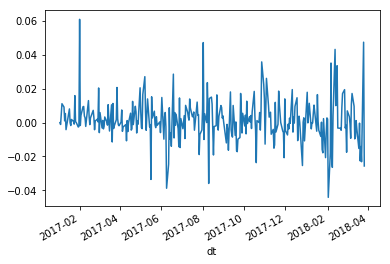

In [17]:
plt.figure()
daily_return_df.AAPL.plot()
#daily_return_df.AAMC.plot()
#daily_return_df.IBM.plot()

#daily_return_df.S1.plot()
#daily_return_df.S11.plot()
#daily_return_df.S2.plot()
#daily_return_df.S3.plot()


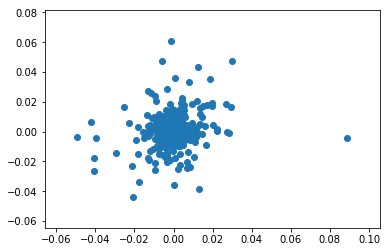

In [18]:
plt.scatter(daily_return_df.IBM.values, daily_return_df.AAPL.values)
#plt.figure()
#plt.plot([0,1,2], [3,4,5])

## Optional  : Save intermediate file and read back in .. Next time can start here

In [19]:
#daily_return_df.to_csv(path_or_buf='daily_return_2017.csv')
#daily_return_df = pd.read_csv('daily_return_2017.csv')

In [20]:
daily_return_df.head(15)

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,...,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.013121,0.008639,0.008206,-0.001119,0.014100,0.024815,0.007939,0.002404,0.006378,-0.002000,-0.001732,0.001546,0.020471,0.017590,0.001145,0.001434,-0.008576,0.009280,0.009173,-0.002914,0.013053,0.009346,0.010306,0.012634,0.011248,...,0.007694,0.0,0.000893,0.013612,0.012334,-0.002836,-0.003179,0.005826,0.015033,0.020027,0.008893,0.004608,0.032243,-0.002089,0.004431,0.003446,-0.007279,-0.011002,0.008188,0.037736,0.014904,0.003639,0.009194,0.014358,0.009703
2017-01-05,-0.011890,-0.017345,-0.000698,0.005085,0.007584,-0.011576,0.008638,-0.014991,0.016996,-0.014373,-0.007374,-0.005981,-0.008243,-0.007611,0.004958,0.005410,-0.012976,0.004275,-0.006533,0.024448,-0.005609,0.001984,0.000421,0.002268,0.017855,...,0.001357,0.0,-0.015522,0.003020,0.009618,0.003840,0.012117,0.002172,0.004616,-0.004462,0.010447,0.002228,0.012849,0.011625,0.000000,-0.011358,-0.012108,-0.014907,-0.013029,-0.004196,-0.009129,0.003310,0.006425,-0.016210,-0.003327
2017-01-06,0.031156,0.006973,-0.013091,0.011148,0.000314,0.013384,0.027204,0.011392,0.022566,0.003926,-0.022941,0.000679,0.002120,0.030807,0.007590,-0.000791,0.035933,-0.002008,0.003431,-0.007925,0.018445,0.000000,0.008935,0.002263,0.003451,...,-0.004066,0.0,-0.002537,0.000645,0.006510,-0.005667,0.021424,-0.013726,0.004978,0.011654,-0.003231,0.005362,0.010827,-0.000714,0.002941,-0.001069,0.019334,-0.000565,-0.000686,-0.015449,-0.007010,0.012097,0.000095,0.006498,0.003152
2017-01-09,0.003126,0.018827,-0.000590,0.009160,0.006584,0.008019,-0.000981,-0.011178,0.002493,0.004749,0.000671,-0.006207,0.005374,0.003657,-0.020904,-0.013145,-0.024535,-0.008691,-0.009546,0.004656,-0.006436,-0.010781,-0.019483,-0.013925,0.003009,...,-0.013610,0.0,-0.014535,-0.024127,-0.006074,-0.005841,-0.015114,0.006592,-0.005525,-0.000886,0.003890,-0.001301,0.003462,-0.004643,-0.015152,-0.016849,0.000169,-0.016497,0.003088,-0.005706,-0.004236,0.002794,0.019436,-0.010837,-0.002773
2017-01-10,-0.000831,0.029737,0.002300,0.001008,-0.002180,-0.007604,0.013500,0.000522,-0.002855,0.005699,-0.006480,-0.002635,-0.009807,0.004900,-0.000385,-0.003049,-0.017346,-0.004140,-0.001295,0.005225,0.012353,-0.015792,0.000956,0.000382,0.004000,...,0.002070,0.0,0.007006,0.012169,0.001667,-0.004156,-0.107422,-0.006986,-0.002299,-0.014191,-0.007749,0.001954,0.022426,0.014208,-0.000248,0.004897,-0.008974,-0.012753,-0.005131,0.008608,-0.004659,0.005882,0.062336,0.015385,-0.000371
2017-01-11,0.023909,0.003300,0.020657,0.005373,-0.045731,-0.038901,-0.005086,0.009213,0.006743,0.003732,-0.010121,0.009785,-0.002805,0.011128,0.004426,0.017064,0.038835,-0.000326,0.006193,-0.022644,-0.003720,-0.006328,0.006369,0.001145,-0.002277,...,0.009466,0.0,0.003295,-0.004189,-0.003724,0.009210,0.009825,0.004397,0.006720,0.004049,0.007485,0.007929,-0.020036,0.007995,0.009928,-0.001083,-0.000513,0.010241,-0.008939,-0.004267,0.005291,-0.007541,0.009501,0.008264,-0.011496
2017-01-12,-0.014822,-0.011102,0.005997,-0.004175,0.002290,0.028578,-0.008763,-0.002928,-0.003670,-0.005508,-0.012952,0.005814,0.004561,-0.002720,-0.004598,0.001741,-0.016143,0.000082,-0.004151,0.000000,-0.010456,0.005686,0.000316,0.001905,-0.002710,...,0.000853,0.0,-0.005474,0.004425,-0.000159,-0.003422,-0.002780,-0.008172,-0.004196,-0.008961,-0.012597,-0.010059,-0.010653,-0.025479,0

## Start some data analysis here !

In [21]:
daily_return_df.corr().head(20)


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,...,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.339687,0.063973,0.393732,0.349067,0.228827,0.515841,0.471059,0.498922,0.441210,0.222587,0.337828,0.283148,0.456106,0.219114,0.188974,0.166238,0.288932,0.128490,0.226729,0.261694,0.181088,0.280801,0.408950,0.244442,...,0.205450,-0.009352,0.409119,0.278653,0.366017,0.393150,0.231740,0.213515,0.390284,0.301136,0.377997,0.397084,0.168716,0.099651,0.170334,0.052953,0.358856,0.239818,0.273484,0.245942,0.473813,0.389319,0.379905,0.367347,0.531726
AAL,0.339687,1.000000,0.120718,0.299161,0.164298,0.228634,0.260613,0.264643,0.237977,0.282761,0.144237,0.232014,0.316243,0.316059,-0.022089,-0.062964,0.100294,0.099790,0.113544,0.158533,0.165912,0.091264,0.253981,0.237149,0.162160,...,-0.014200,0.040428,0.350730,0.161415,0.243364,0.201249,0.192846,0.134172,0.311337,0.165586,0.196685,0.396056,0.089556,0.092635,-0.013301,0.123890,0.236434,0.189827,0.137148,0.303051,0.233476,0.242590,0.236722,0.392114,0.228067
AAP,0.063973,0.120718,1.000000,-0.007635,0.096735,0.107301,0.140953,0.131309,-0.051988,0.047342,0.101466,0.104270,0.123753,-0.029049,0.017892,-0.016138,0.040247,0.105782,0.052150,0.076277,0.071064,-0.022873,0.178460,0.139573,0.051273,...,0.014895,-0.003857,0.196899,0.122790,0.093531,0.202138,0.094465,0.097319,0.182793,0.193294,0.154654,0.181772,-0.129460,0.113611,0.008641,0.002820,0.013642,0.172612,0.049050,0.147152,0.126041,0.132518,0.098557,0.262278,0.123890
AAPL,0.393732,0.299161,-0.007635,1.000000,0.172266,0.205687,0.308142,0.374143,0.428967,0.498906,0.145748,0.100490,0.266421,0.362627,0.064007,0.015697,0.061817,0.201317,0.106874,0.203468,0.117395,0.105025,0.175658,0.211295,0.199389,...,0.037314,0.072444,0.257483,0.183366,0.255792,0.307236,0.217509,0.184846,0.315937,0.210163,0.208934,0.260656,0.181628,0.215444,0.044940,-0.020722,0.418123,0.258786,0.195426,0.247475,0.241414,0.273018,0.242041,0.250803,0.301611
ABBV,0.349067,0.164298,0.096735,0.172266,1.000000,0.329684,0.425948,0.406838,0.247068,0.162316,0.178429,0.197724,0.199737,0.144473,0.092721,-0.009922,0.038977,0.178039,0.137236,0.257209,0.152824,0.178461,0.217420,0.456625,0.176017,...,0.065659,-0.135218,0.288589,0.245760,0.320739,0.294461,0.201244,0.200913,0.301878,0.222376,0.208728,0.181917,0.010940,0.103050,0.054916,0.075888,0.217352,0.271825,0.202647,0.183339,0.289100,0.216679,0.254434,0.210125,0.394780
ABC,0.228827,0.228634,0.107301,0.205687,0.329684,1.000000,0.328126,0.267001,0.158240,0.150608,0.191313,0.190505,0.207225,0.213769,-0.011475,0.038666,0.005731,0.140740,0.176968,0.340827,0.144202,0.114362,0.144163,0.297966,0.151617,...,-0.003572,0.032071,0.318679,0.245909,0.334170,0.135531,0.181213,0.254101,0.273288,0.177157,0.151470,0.163219,0.174455,0.099762,0.046291,0.117292,0.101001,0.145143,0.296769,0.198196,0.179405,0.107430,0.279800,0.184300,0.274574
ABT,0.515841,0.260613,0.140953,0.308142,0.425948,0.328126,1.000000,0.453053,0.352989,0.294226,0.201338,0.263962,0.224468,0.293700,0.241012,0.173628,0.173548,0.289133,0.179723,0.300836,0.290435,0.248838,0.348263,0.368317,0.316279,...,0.188800,0.046588,0.409365,0.286181,0.403732,0.394639,0.191205,0.276735,0.384194,0.268970,0.368071,0.317924,0.127969,0.136497,0.167567,0.122422,0.232632,0.283533,0.326184,0.188928,0.359941,0.375189,0.426691,0.332181,0.477991
ACN,0.471059,0.264643,0.131309,0.374143,0.406838,0.267001,0.453053,1.000000,0.447311,0.383728,0.286270,0.399831,0.293878,0.359819,0.192563,0.139520,0.176223,0.193182,0.128855,0.203963,0.316608,0.233574,0.329799,0.421920,0.249068,...,0.196302,-0.077170,0.479609,0.263695,0.417693,0.443225,0.164483,0.314981,0.401189,0.394103,0.345638,0.310941,0.135843,0.157596,0.152415,0.122852,0.416437,0.355482,0.281497,0.260083,0.421033,0.340518,0.335468,0.380631,0.405306
ADBE,0.498922,0.237977,-0.051988,0.428967,0

In [22]:
num_symbols = len(daily_return_df.columns)
num_symbols

503

In [23]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
dr_pca_df = pca.fit_transform(daily_return_df)

In [24]:
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_


array([0.196  , 0.04835, 0.03359, 0.03209, 0.02312, 0.01864, 0.01617,
       0.01558, 0.01459, 0.01374, 0.01254, 0.01166, 0.01112, 0.01076,
       0.01029, 0.01006, 0.0097 , 0.00929, 0.0091 , 0.00892, 0.00874,
       0.00846, 0.00831, 0.00806, 0.00772, 0.00759, 0.00748, 0.0072 ,
       0.00714, 0.00694, 0.00687, 0.00665, 0.00644, 0.0063 , 0.00609,
       0.00601, 0.00593, 0.00578, 0.00564, 0.00551, 0.00538, 0.0053 ,
       0.00523, 0.00511, 0.005  , 0.00493, 0.00487, 0.00481, 0.00466,
       0.00464, 0.00454, 0.00445, 0.0044 , 0.00435, 0.00433, 0.0042 ,
       0.00405, 0.00397, 0.0039 , 0.00383, 0.00376, 0.00368, 0.00359,
       0.00355, 0.00354, 0.00345, 0.00341, 0.00338, 0.00329, 0.00325,
       0.00325, 0.00318, 0.00317, 0.00308, 0.00305, 0.00297, 0.00291,
       0.00287, 0.00286, 0.00278, 0.00276, 0.00275, 0.00263, 0.00257,
       0.00251, 0.0025 , 0.00249, 0.00243, 0.0024 , 0.00236, 0.00232,
       0.00228, 0.00227, 0.00225, 0.00219, 0.00215, 0.00212, 0.00209,
       0.00204, 0.00

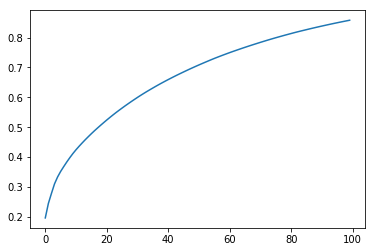

In [25]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum
plt.figure()
plt.plot(cumsum)

In [26]:
# Experiment 1 : Try one week intervals
# 


In [29]:
n_components=100
Col_headings = ['P'+str(x) for x in range(n_components)]
pcomps = pd.DataFrame(dr_pca_df) 
pcomps.columns = Col_headings
# concatenate the Churn column on the end so its easy to plot by Churn
# if 'Churn' not in pcomps.columns:
#    pcomps = pd.concat([pcomps, label], axis=1)
pcomps.head()


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,...,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99
0,0.010549,0.012071,-0.000265,0.001806,-0.001245,-0.002514,-0.000123,-0.007911,0.002681,-0.002339,0.002840,0.003018,0.001528,-0.001151,-0.003779,-0.000076,0.001344,-0.000108,-0.001473,0.000822,0.000202,0.001093,-0.000135,-0.000455,-0.001267,...,-0.001402,0.001353,0.000734,-0.000681,-0.000116,-0.000361,-0.001081,-0.000347,0.000652,-0.000129,0.001368,0.000955,-0.000296,-0.001341,0.000972,0.000879,0.000260,-0.000825,0.000071,-0.000649,-0.001382,-0.000460,-0.000469,0.000924,-0.000756
1,-0.229101,0.028277,0.052740,0.029881,0.040853,-0.005053,0.019026,0.000356,0.046054,-0.001423,0.074768,-0.009386,0.052230,0.014097,0.036408,-0.011555,-0.015471,-0.026456,0.020722,0.005174,-0.011692,-0.021597,0.020067,-0.001571,0.056908,...,0.003215,-0.011643,-0.006567,0.016103,-0.002244,-0.013782,0.007670,0.027123,-0.003222,-0.011451,-0.015860,-0.012784,0.005799,0.027248,-0.035854,0.016671,0.021328,0.015755,0.014400,-0.008746,0.028746,0.039090,0.021283,-0.000523,-0.019562
2,0.114483,-0.074043,-0.118278,0.069974,-0.008695,0.036899,0.089123,-0.094212,0.000293,0.035290,0.044138,0.043488,-0.050803,0.026490,-0.116107,-0.049973,0.013352,-0.062873,0.004448,-0.015131,0.055436,-0.005510,0.027510,-0.057996,0.071865,...,0.010113,-0.010637,-0.000401,0.003759,0.015733,0.009641,0.027563,-0.002628,-0.043009,0.016834,-0.013856,-0.015455,-0.027081,-0.008706,-0.011258,0.031001,0.014413,-0.004914,-0.006002,0.007541,-0.029202,-0.004454,-0.022928,0.005826,-0.008433
3,-0.067130,-0.046503,-0.009823,-0.018570,0.011682,0.016656,0.031177,-0.018634,-0.010767,-0.007057,-0.012667,-0.012737,-0.013533,-0.019423,0.011150,0.010864,-0.009016,0.008116,-0.002171,0.004095,-0.010392,-0.000200,0.003102,-0.014205,0.011028,...,0.031516,0.009547,-0.027678,0.022302,-0.001806,0.021853,-0.020394,-0.010151,0.031419,-0.014139,-0.012325,-0.015708,-0.008810,-0.040872,0.011684,-0.010807,-0.008117,-0.002461,-0.007583,0.001064,-0.038407,0.000322,-0.016130,-0.012639,0.005335
4,0.114217,-0.088991,0.022537,-0.064532,0.100623,-0.040249,-0.042566,-0.014093,-0.001780,0.038125,-0.019308,0.000202,0.024660,0.009566,-0.026386,-0.004233,0.035456,-0.047067,0.002035,0.003486,-0.035400,0.043165,-0.023595,-0.007031,0.003954,...,0.001198,0.011528,0.017268,-0.020808,-0.030956,-0.010497,0.009539,-0.021326,-0.004593,-0.009692,0.009280,-0.035139,-0.012895,0.013095,-0.013787,0.007212,0.021839,0.030390,0.003075,0.028690,0.008670,-0.020363,-0.024670,-0.021088,0.005261


In [30]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
downsample pcomps !!!

from pandas import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# make a scatter plot
# pd.plotting.scatter_matrix(pcomps[pcomps['P0'] <1], alpha =.3,  figsize=[16,16])
pd.plotting.scatter_matrix(pcomps, alpha =.3,  figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='x',c=churn_cat_encode_new2.InternetService0.astype('int').apply(lambda x:churn_colors[x]), figsize=[16,16])

plt.show()

SyntaxError: invalid syntax (<ipython-input-30-86cc80ab54c8>, line 2)

### New idea ~ Transpose . run kmeans on SNP time series data

In [31]:
daily_return_tpdf = daily_return_df.transpose()
daily_return_tpdf.head()

dt,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,2017-01-20 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,2017-01-25 00:00:00,2017-01-26 00:00:00,2017-01-27 00:00:00,2017-01-30 00:00:00,2017-01-31 00:00:00,2017-02-01 00:00:00,2017-02-02 00:00:00,2017-02-03 00:00:00,2017-02-06 00:00:00,2017-02-07 00:00:00,...,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00,2018-03-05 00:00:00,2018-03-06 00:00:00,2018-03-07 00:00:00,2018-03-08 00:00:00,2018-03-09 00:00:00,2018-03-12 00:00:00,2018-03-13 00:00:00,2018-03-14 00:00:00,2018-03-15 00:00:00,2018-03-16 00:00:00,2018-03-19 00:00:00,2018-03-20 00:00:00,2018-03-21 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-26 00:00:00,2018-03-27 00:00:00
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.013121,-0.011890,0.031156,0.003126,-0.000831,0.023909,-0.014822,0.003504,-0.007599,-0.001449,-0.012642,-0.000420,-0.004830,-0.000844,0.022386,-0.004958,0.009965,-0.020144,0.027271,0.005922,-0.007308,0.009816,-0.002228,0.007510,...,0.002392,-0.008000,0.000283,-0.001697,-0.022386,-0.005942,-0.017641,0.001929,0.000593,0.008290,0.023345,0.002152,0.018325,-0.005905,-0.000424,-0.010753,0.003719,-0.003990,-0.008011,0.007355,-0.006442,-0.027810,-0.020898,0.032395,-0.017595
AAL,0.0,0.008639,-0.017345,0.006973,0.018827,0.029737,0.003300,-0.011102,-0.009356,-0.018888,0.019037,-0.007976,0.015658,-0.022083,0.012782,0.007783,0.035066,-0.053237,-0.043663,-0.014477,-0.004520,-0.000908,0.004317,0.024887,-0.002870,...,0.020882,0.003409,0.007739,0.030155,-0.013455,-0.000184,-0.014194,-0.005610,0.000188,0.007144,0.010080,0.012567,0.023362,0.007669,-0.004779,-0.016895,-0.001990,0.004169,-0.014079,0.012816,-0.022234,-0.032908,-0.024852,0.016663,-0.018511
AAP,0.0,0.008206,-0.000698,-0.013091,-0.000590,0.002300,0.020657,0.005997,0.001834,-0.010241,0.005665,-0.012990,-0.001281,-0.021691,0.003040,-0.004694,-0.011940,-0.006828,0.001582,-0.002369,-0.022224,0.010897,0.002526,-0.015238,-0.006801,...,0.082107,-0.030789,0.052765,-0.012638,-0.043970,0.040528,0.028534,-0.012254,0.002498,0.019165,-0.015347,-0.008735,0.026868,-0.003786,0.004983,-0.016303,0.000342,-0.004014,-0.006516,-0.013981,0.008665,-0.030632,-0.007788,0.035457,0.002091
AAPL,0.0,-0.001119,0.005085,0.011148,0.009160,0.001008,0.005373,-0.004175,-0.001761,0.008065,-0.000083,-0.001750,0.001837,0.000667,-0.000916,0.015921,0.000492,0.000082,-0.002624,-0.002302,0.060981,-0.001709,0.004279,0.009374,0.009517,...,-0.004539,0.008944,0.017121,0.019453,-0.003241,-0.001514,-0.017516,0.006914,0.003462,-0.000848,-0.009283,0.010912,0.017181,0.009668,-0.009630,-0.008501,0.001177,-0.003526,-0.015279,-0.000342,-0.022655,-0.014159,-0.023128,0.047472,-0.025641
ABBV,0.0,0.014100,0.007584,0.000314,0.006584,-0.002180,-0.045731,0.002290,0.011586,-0.002097,-0.003233,-0.004541,-0.003747,-0.003107,-0.006234,0.013206,-0.001792,-0.020728,0.007167,0.011253,-0.003600,0.000000,-0.003613,-0.000330,-0.001484,...,-0.000593,-0.002968,0.010122,0.023495,-0.026987,-0.020548,-0.017180,0.010541,0.005389,-0.009511,0.001397,0.019962,0.019486,-0.008299,0.012257,-0.006764,-0.033714,-0.010615,-0.014774,0.005534,-0.001775,-0.127612,-0.006524,-0.022368,-0.034320


In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 11, random_state=0).fit(daily_return_tpdf)

In [96]:
kmeans.labels_

array([ 9,  6,  8,  1,  7,  7,  7,  9,  1,  1,  3,  9,  6,  1,  3,  3,  3,
        7,  0,  7,  9,  3,  4,  9,  0,  9,  1,  6,  9,  9,  7,  1,  1,  9,
        6,  7,  4,  3,  1,  9,  9,  7,  9,  6,  2,  2,  9,  9,  9,  3,  6,
        1,  3,  1,  9,  3,  9,  6,  8,  9,  4,  7,  4,  8,  7,  6,  9,  0,
        7,  4,  9,  6,  6,  7,  7,  6,  3,  4,  7,  3,  7,  6,  9,  9,  9,
        0,  3,  9,  1,  7,  7,  6,  4,  3,  9,  0,  7,  9,  3,  3,  4,  0,
        9,  6,  6,  3,  7,  3,  4,  2,  9,  7,  2,  9,  3,  3,  1,  9,  6,
        9,  0,  9,  9,  7,  6,  2,  3,  6,  6,  4,  8,  7,  6,  7,  0,  0,
        0,  0,  3,  8,  6,  3,  3,  9,  3,  3,  7,  2,  9,  9,  1,  1,  9,
        3,  9,  3,  9,  6,  6,  2,  3,  3,  2,  3,  7,  3,  4,  6,  3,  7,
        7,  3,  9,  9,  3,  6,  6,  1,  6,  6,  6,  3,  9,  9,  3,  4,  8,
        9,  6,  6,  6,  0,  0,  3,  2,  9,  9,  6,  3,  7,  3,  6,  6,  1,
        1,  8,  1,  8,  9,  4,  6,  6,  2,  9,  4,  0,  7,  3,  9,  2,  9,
        9,  9,  6,  7,  9

In [97]:
a = daily_return_tpdf.copy()

In [98]:
a['kmeans'] = pd.Series(kmeans.labels_, index=a.index)

In [99]:
a.head()

dt,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,2017-01-20 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,2017-01-25 00:00:00,2017-01-26 00:00:00,2017-01-27 00:00:00,2017-01-30 00:00:00,2017-01-31 00:00:00,2017-02-01 00:00:00,2017-02-02 00:00:00,2017-02-03 00:00:00,2017-02-06 00:00:00,2017-02-07 00:00:00,...,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00,2018-03-05 00:00:00,2018-03-06 00:00:00,2018-03-07 00:00:00,2018-03-08 00:00:00,2018-03-09 00:00:00,2018-03-12 00:00:00,2018-03-13 00:00:00,2018-03-14 00:00:00,2018-03-15 00:00:00,2018-03-16 00:00:00,2018-03-19 00:00:00,2018-03-20 00:00:00,2018-03-21 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-26 00:00:00,2018-03-27 00:00:00,kmeans
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.013121,-0.011890,0.031156,0.003126,-0.000831,0.023909,-0.014822,0.003504,-0.007599,-0.001449,-0.012642,-0.000420,-0.004830,-0.000844,0.022386,-0.004958,0.009965,-0.020144,0.027271,0.005922,-0.007308,0.009816,-0.002228,0.007510,...,-0.008000,0.000283,-0.001697,-0.022386,-0.005942,-0.017641,0.001929,0.000593,0.008290,0.023345,0.002152,0.018325,-0.005905,-0.000424,-0.010753,0.003719,-0.003990,-0.008011,0.007355,-0.006442,-0.027810,-0.020898,0.032395,-0.017595,9
AAL,0.0,0.008639,-0.017345,0.006973,0.018827,0.029737,0.003300,-0.011102,-0.009356,-0.018888,0.019037,-0.007976,0.015658,-0.022083,0.012782,0.007783,0.035066,-0.053237,-0.043663,-0.014477,-0.004520,-0.000908,0.004317,0.024887,-0.002870,...,0.003409,0.007739,0.030155,-0.013455,-0.000184,-0.014194,-0.005610,0.000188,0.007144,0.010080,0.012567,0.023362,0.007669,-0.004779,-0.016895,-0.001990,0.004169,-0.014079,0.012816,-0.022234,-0.032908,-0.024852,0.016663,-0.018511,6
AAP,0.0,0.008206,-0.000698,-0.013091,-0.000590,0.002300,0.020657,0.005997,0.001834,-0.010241,0.005665,-0.012990,-0.001281,-0.021691,0.003040,-0.004694,-0.011940,-0.006828,0.001582,-0.002369,-0.022224,0.010897,0.002526,-0.015238,-0.006801,...,-0.030789,0.052765,-0.012638,-0.043970,0.040528,0.028534,-0.012254,0.002498,0.019165,-0.015347,-0.008735,0.026868,-0.003786,0.004983,-0.016303,0.000342,-0.004014,-0.006516,-0.013981,0.008665,-0.030632,-0.007788,0.035457,0.002091,8
AAPL,0.0,-0.001119,0.005085,0.011148,0.009160,0.001008,0.005373,-0.004175,-0.001761,0.008065,-0.000083,-0.001750,0.001837,0.000667,-0.000916,0.015921,0.000492,0.000082,-0.002624,-0.002302,0.060981,-0.001709,0.004279,0.009374,0.009517,...,0.008944,0.017121,0.019453,-0.003241,-0.001514,-0.017516,0.006914,0.003462,-0.000848,-0.009283,0.010912,0.017181,0.009668,-0.009630,-0.008501,0.001177,-0.003526,-0.015279,-0.000342,-0.022655,-0.014159,-0.023128,0.047472,-0.025641,1
ABBV,0.0,0.014100,0.007584,0.000314,0.006584,-0.002180,-0.045731,0.002290,0.011586,-0.002097,-0.003233,-0.004541,-0.003747,-0.003107,-0.006234,0.013206,-0.001792,-0.020728,0.007167,0.011253,-0.003600,0.000000,-0.003613,-0.000330,-0.001484,...,-0.002968,0.010122,0.023495,-0.026987,-0.020548,-0.017180,0.010541,0.005389,-0.009511,0.001397,0.019962,0.019486,-0.008299,0.012257,-0.006764,-0.033714,-0.010615,-0.014774,0.005534,-0.001775,-0.127612,-0.006524,-0.022368,-0.034320,7


In [100]:
sectors_df

a2 = a.join(sectors_df.set_index('Tickersymbol'), how='inner')
a2.head(2)

,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,2017-01-19 00:00:00,2017-01-20 00:00:00,2017-01-23 00:00:00,2017-01-24 00:00:00,2017-01-25 00:00:00,2017-01-26 00:00:00,2017-01-27 00:00:00,2017-01-30 00:00:00,2017-01-31 00:00:00,2017-02-01 00:00:00,2017-02-02 00:00:00,2017-02-03 00:00:00,2017-02-06 00:00:00,2017-02-07 00:00:00,...,2018-03-05 00:00:00,2018-03-06 00:00:00,2018-03-07 00:00:00,2018-03-08 00:00:00,2018-03-09 00:00:00,2018-03-12 00:00:00,2018-03-13 00:00:00,2018-03-14 00:00:00,2018-03-15 00:00:00,2018-03-16 00:00:00,2018-03-19 00:00:00,2018-03-20 00:00:00,2018-03-21 00:00:00,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-26 00:00:00,2018-03-27 00:00:00,kmeans,Security,SECfilings,GICSSector,GICSSubIndustry,AddressofHeadquarters,Datefirstadded,CIK
A,0.0,0.013121,-0.011890,0.031156,0.003126,-0.000831,0.023909,-0.014822,0.003504,-0.007599,-0.001449,-0.012642,-0.000420,-0.004830,-0.000844,0.022386,-0.004958,0.009965,-0.020144,0.027271,0.005922,-0.007308,0.009816,-0.002228,0.00751,...,0.000593,0.008290,0.023345,0.002152,0.018325,-0.005905,-0.000424,-0.010753,0.003719,-0.003990,-0.008011,0.007355,-0.006442,-0.027810,-0.020898,0.032395,-0.017595,9,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",6/5/00,1090872
AAL,0.0,0.008639,-0.017345,0.006973,0.018827,0.029737,0.003300,-0.011102,-0.009356,-0.018888,0.019037,-0.007976,0.015658,-0.022083,0.012782,0.007783,0.035066,-0.053237,-0.043663,-0.014477,-0.004520,-0.000908,0.004317,0.024887,-0.00287,...,0.000188,0.007144,0.010080,0.012567,0.023362,0.007669,-0.004779,-0.016895,-0.001990,0.004169,-0.014079,0.012816,-0.022234,-0.032908,-0.024852,0.016663,-0.018511,6,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",3/23/15,6201


In [101]:
#ax = sns.heatmap(data=a2['GICSSector','kmeans'], linewidths=.5)

a2["sector_match"] = np.where(a2['GICSSector'] == a2['kmeans'],1,0 )

In [102]:
piv = pd.pivot_table(a2, values="sector_match",index=["kmeans"], columns=["GICSSector"],aggfunc='count',)


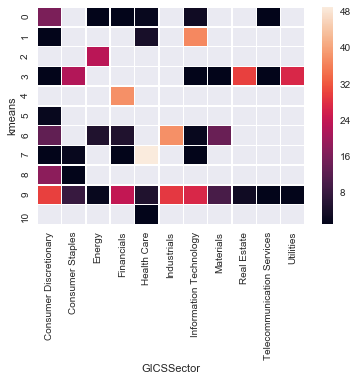

In [103]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

a2.columns
#[a2['GICSSector'],a2['kmeans']]

ax = sns.heatmap(piv, linewidths=.5)


In [69]:
### PCA using simulated data ....


In [70]:
def create_data():
    freq= [0.1,0.2,0.3]
    amp = [5,10,20]
    phase = [5,10,5]
    s = []
    s.append(amp[0]*np.sin(freq[0]*np.arange(100)+phase[0]))
    s.append(amp[0]*np.sin(freq[1]*np.arange(100)+phase[1]))
    s.append(amp[0]*np.sin(freq[2]*np.arange(100)+phase[2]))

    return np.asarray(s) # tall /skinny

In [ ]:
a = create_data()

In [ ]:
a.shape

In [ ]:
plt.figure()
plt.plot(a[2],a[1])
#plt.plot(a[1])
#plt.plot(a[2])
#daily_return_df.AAMC.plot()

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 4)
stk_pca_df = pca2.fit_transform(a)
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
pca2.explained_variance_ratio_